# Given medical information, we need to find that a patient has cancer or not

### Class 2 : Benign - means not Cancerour

### Class 4 : Malignant - means Cancerous

In [1]:
## Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [3]:
## Reading the dataset

master = pd.read_csv("cancer_data1.csv")

master.head(10)

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [4]:
## Checking the info

master.info()

## NON- NULL DATA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      699 non-null    int64 
 1   clump_thickness         699 non-null    int64 
 2   uniform_cell_size       699 non-null    int64 
 3   uniform_cell_shape      699 non-null    int64 
 4   marginal_adhesion       699 non-null    int64 
 5   single_epithelial_size  699 non-null    int64 
 6   bare_nuclei             699 non-null    object
 7   bland_chromatin         699 non-null    int64 
 8   normal_nucleoli         699 non-null    int64 
 9   mitoses                 699 non-null    int64 
 10  class                   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
## bare_nuclei, which seems to have int values is shown as object
## checking the unique values in this column to analyse the problem

master.bare_nuclei.unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [9]:
# it has a "?" in between which need to be treated
## checking the count of other values in bare nuclei

master.bare_nuclei.value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [11]:
## "1" as the highest count and since there are only 16 "?" values, which means 2.2% values, we can replace it wiht mode
16/699 *100

2.28898426323319

In [16]:
## storing the mode of bare nuclei in m

m = master.bare_nuclei.mode()[0]
m

'1'

In [17]:
## using lambda function to replace the value of bare nuclei and converrting them to int simultaneously

master.bare_nuclei = master.bare_nuclei.apply(lambda x: int(m) if x == "?" else int(x))

master.bare_nuclei.unique()   ## checking if "?" has been converted

array([ 1, 10,  2,  4,  3,  9,  7,  5,  8,  6], dtype=int64)

In [19]:
## Checking duplicate values

master.duplicated().sum() ## 9 duplicated values

9

In [21]:
## Dropping the duplicate values

master.drop_duplicates(inplace = True)

len(master)  ## checking length again to see of duplicated have been dropped

690

## Visualization and EDA

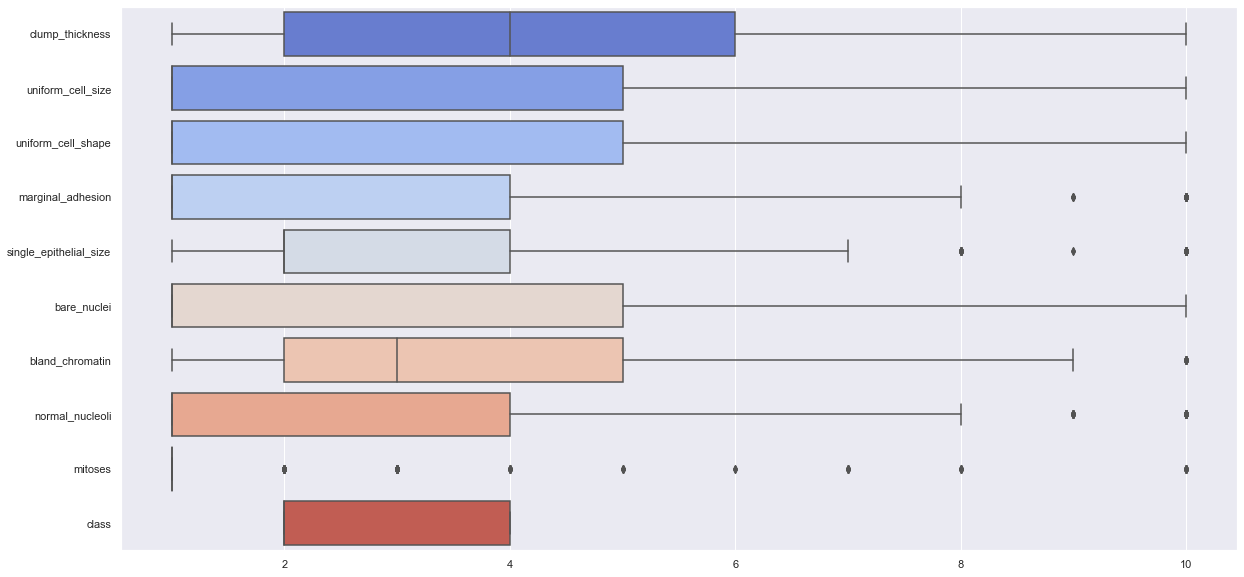

In [35]:
## Checking outliers in the data

sliced_data = master.iloc[0:,1:]

sns.set(rc={'figure.figsize':(20,10)})

sns.boxplot(data = sliced_data, palette='coolwarm',orient='h')

##outlier in:
#1. marginal adhesion
#2. single epithelial size
#3. bland chromatin
#4. normal nucleoli
#5. mitoses

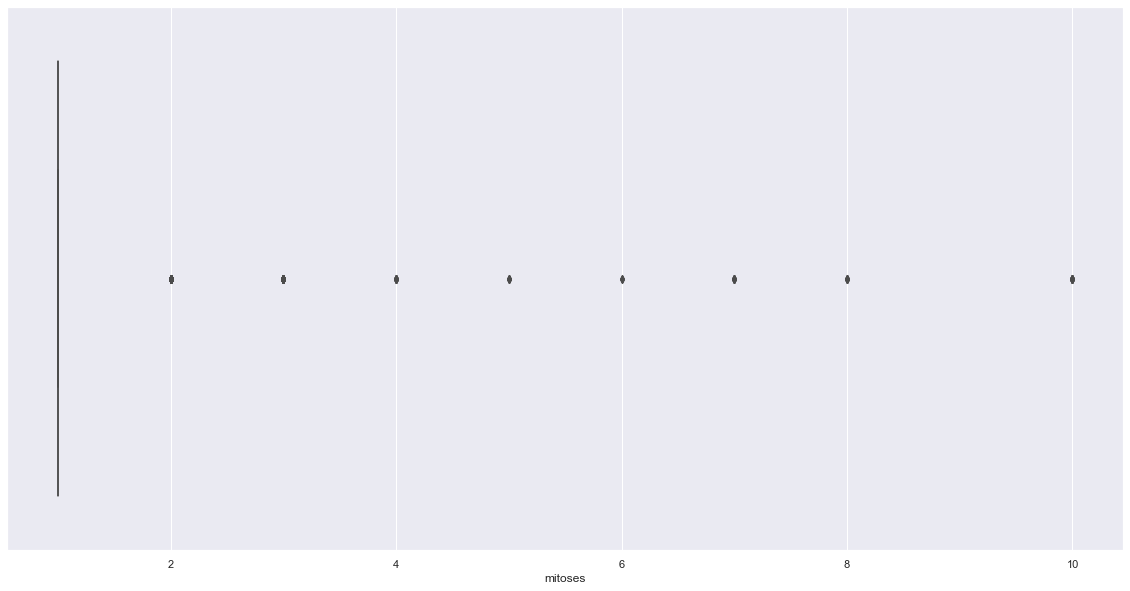

In [36]:
sns.boxplot(master.mitoses)

In [38]:
master.mitoses.unique()  ## it is some sort of categorical data

array([ 1,  5,  4,  2,  3,  7, 10,  8,  6], dtype=int64)

In [39]:
display(master.marginal_adhesion.value_counts(),
master.single_epithelial_size.value_counts(),
master.bland_chromatin.value_counts(),
master.normal_nucleoli.value_counts())


## all the values seem to be categorical values
## better not to treat the outliers

1     400
3      58
2      56
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: marginal_adhesion, dtype: int64

2     382
3      71
4      48
1      45
6      41
5      39
10     30
8      20
7      12
9       2
Name: single_epithelial_size, dtype: int64

2     165
3     160
1     151
7      71
4      40
5      34
8      28
10     20
9      11
6      10
Name: bland_chromatin, dtype: int64

1     436
10     61
3      42
2      36
8      24
6      22
5      19
4      18
9      16
7      16
Name: normal_nucleoli, dtype: int64

In [41]:
## Checking correlation between values

master.corr()

## target variable, class seeems to have a good correlation with all except id and mitoses
## it would be fine to drop these columns for further analyses
## also id doesnot have an effect on anything

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
id,1.000000,-0.059592,-0.043856,-0.042803,-0.066771,-0.048102,-0.091832,-0.059802,-0.054517,-0.036286,-0.080084
clump_thickness,-0.059592,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
uniform_cell_size,-0.043856,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
uniform_cell_shape,-0.042803,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
marginal_adhesion,-0.066771,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
single_epithelial_size,-0.048102,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
bare_nuclei,-0.091832,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
bland_chromatin,-0.059802,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
normal_nucleoli,-0.054517,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
mitoses,-0.036286,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947


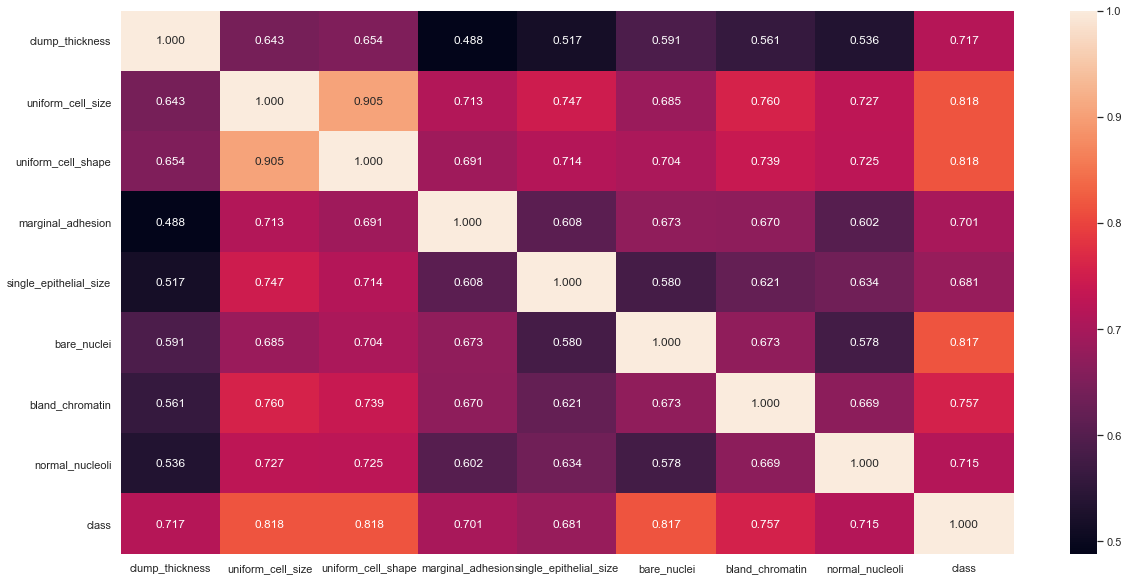

In [45]:
## Creating a heatmap after dropping the 2 columns

new_master = master.drop(['id', 'mitoses'], axis =1)

sns.heatmap(new_master.corr(), annot = True, fmt = '0.3f')

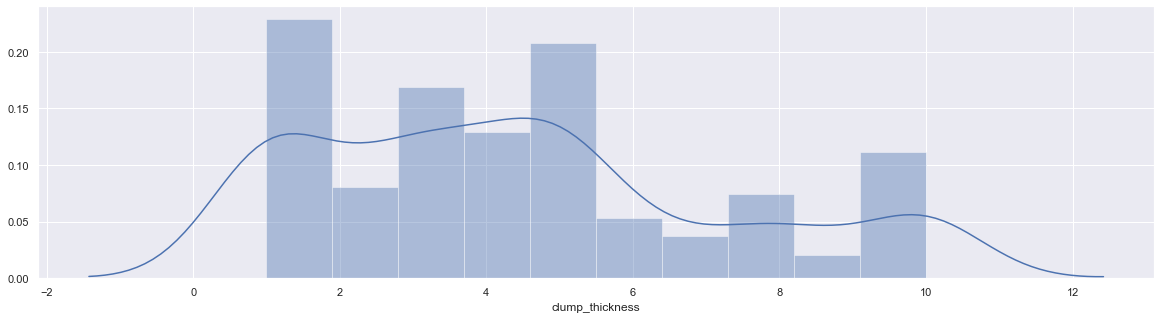

In [47]:
## Visualising distributions of each variable

#1. clump thickness
sns.set(rc={'figure.figsize':(20,5)})
sns.distplot(master.clump_thickness)

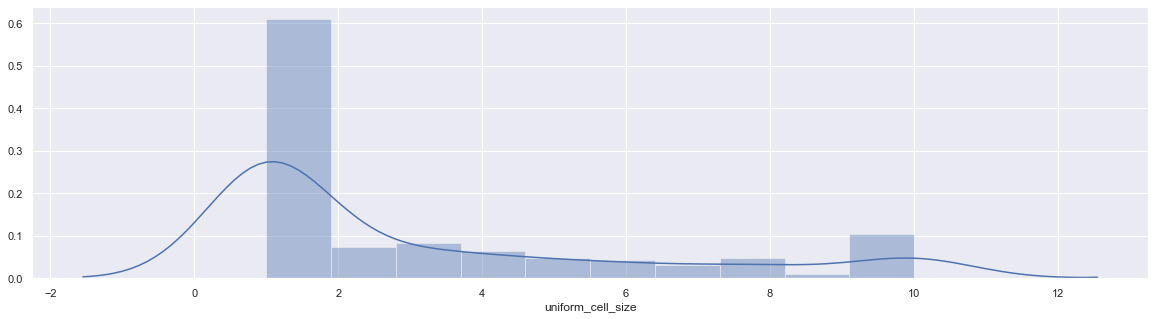

In [48]:
#2. uniform_cell_size
 
sns.set(rc={'figure.figsize':(20,5)})
sns.distplot(master.uniform_cell_size)  ##skewed observations

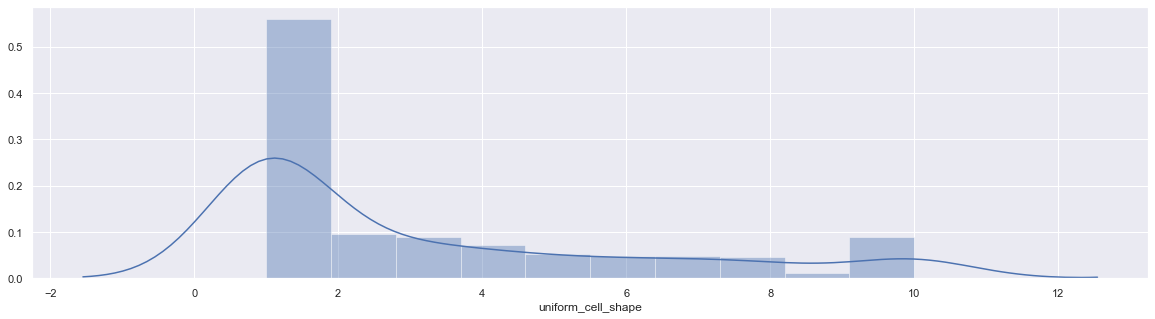

In [49]:
#2. uniform_cell_shape
 
sns.set(rc={'figure.figsize':(20,5)})
sns.distplot(master.uniform_cell_shape)     ##skewed observations

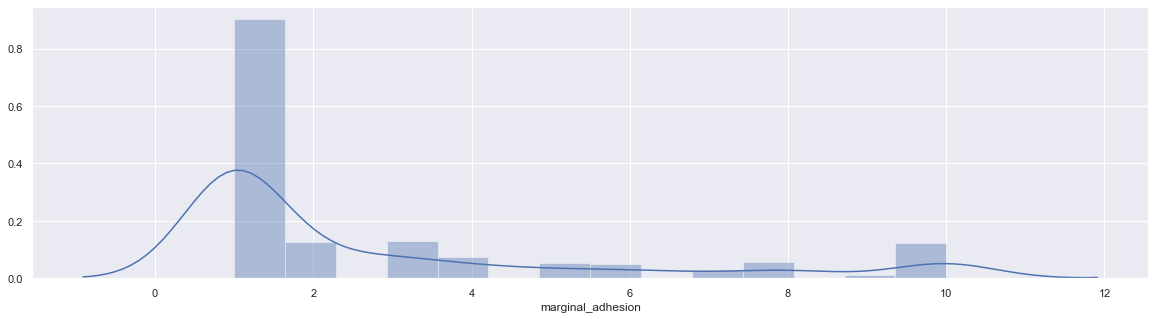

In [50]:
#2. marginal_adhesion
 
sns.set(rc={'figure.figsize':(20,5)})
sns.distplot(master.marginal_adhesion)     ##skewed observations

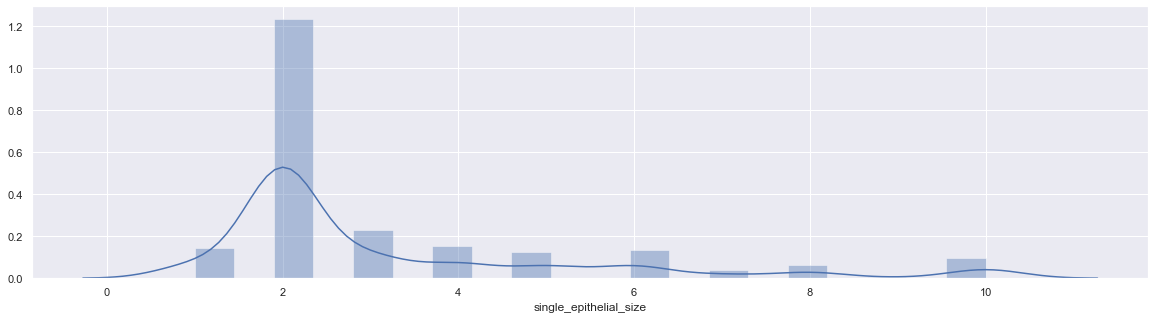

In [51]:
#3. single_epithelial_size
 
sns.set(rc={'figure.figsize':(20,5)})
sns.distplot(master.single_epithelial_size)     ##skewed observations

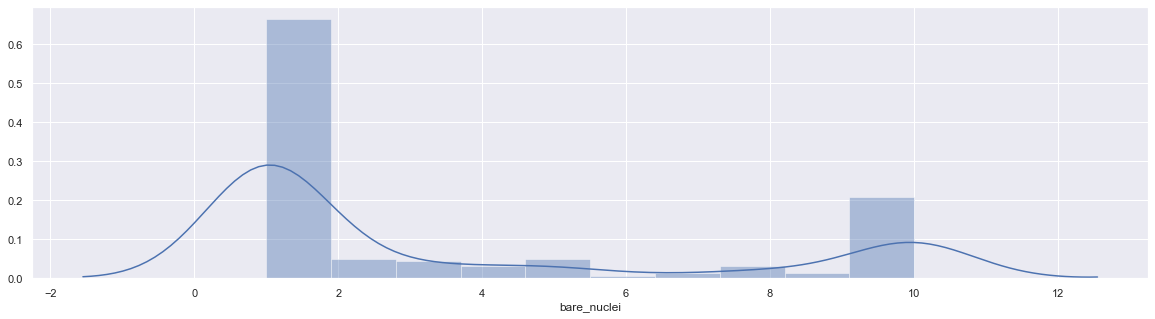

In [52]:
#4. bare_nuclei
 
sns.set(rc={'figure.figsize':(20,5)})
sns.distplot(master.bare_nuclei)     ##skewed observations

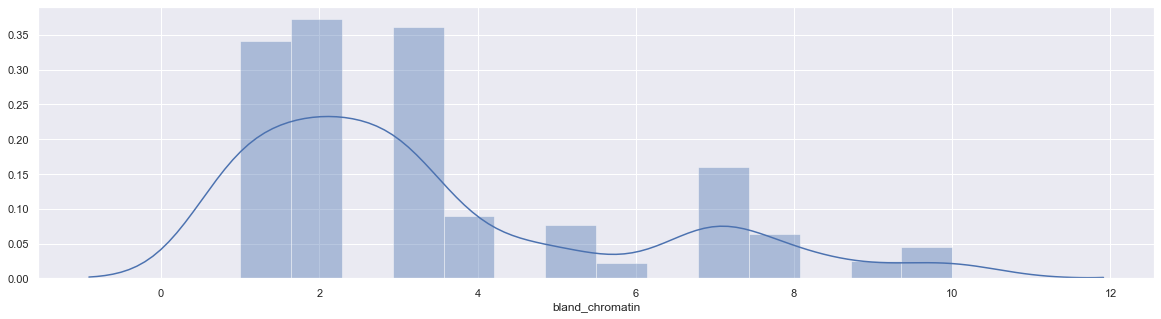

In [53]:
#5. bland_chromatin
 
sns.set(rc={'figure.figsize':(20,5)})
sns.distplot(master.bland_chromatin)     ##skewed observations

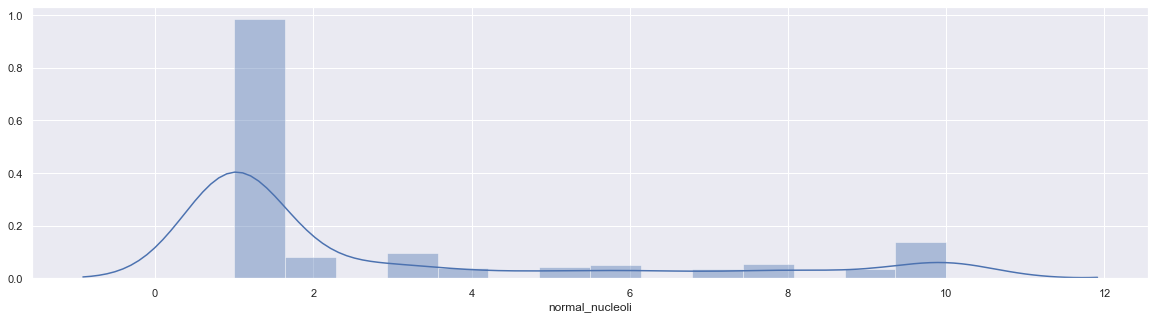

In [54]:
#5. normal_nucleoli
 
sns.set(rc={'figure.figsize':(20,5)})
sns.distplot(master.normal_nucleoli)     ##skewed observations

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

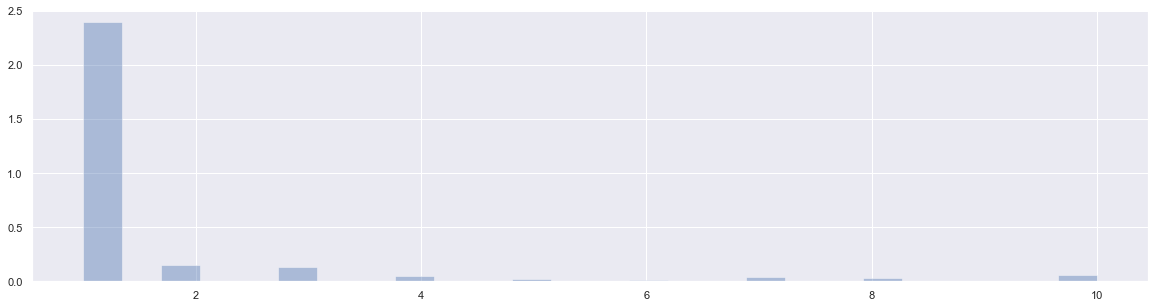

In [55]:
#6. mitoses
 
sns.set(rc={'figure.figsize':(20,5)})
sns.distplot(master.mitoses)   

In [56]:
## BIVARIATE ANALYSIS

master.columns

Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

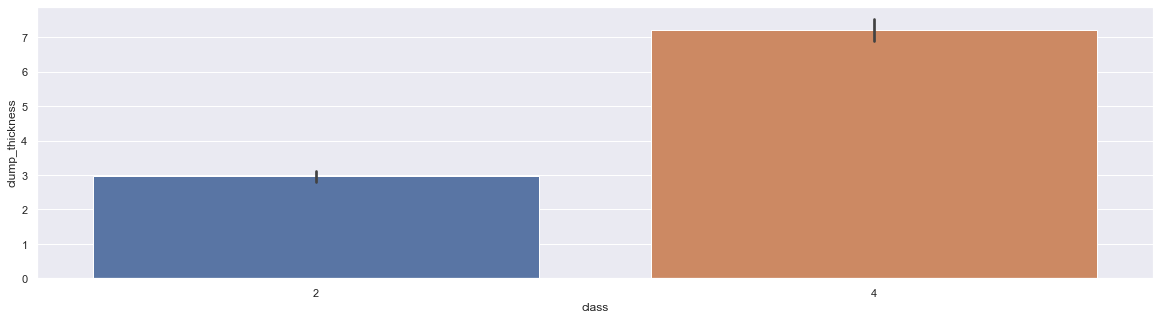

In [58]:
sns.barplot(x='class',y='clump_thickness',data=master)

In [63]:
master.clump_thickness.unique()

array([ 5,  3,  6,  4,  8,  1,  2,  7, 10,  9], dtype=int64)

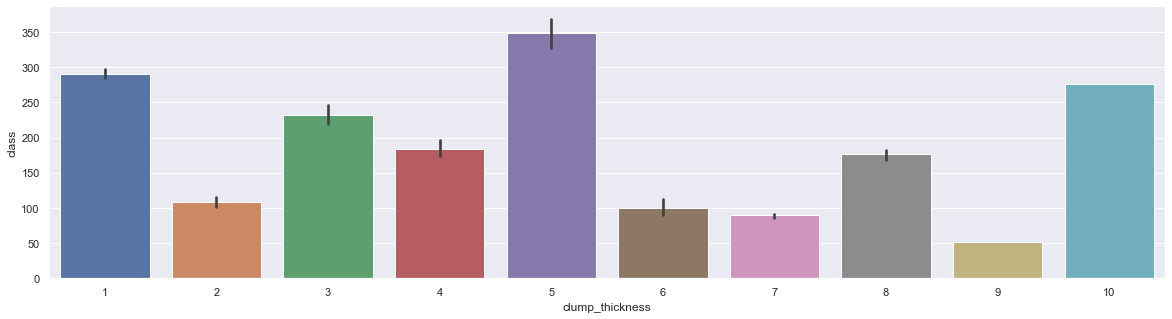

In [67]:
sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(x='clump_thickness',y='class',data=master, estimator = sum)

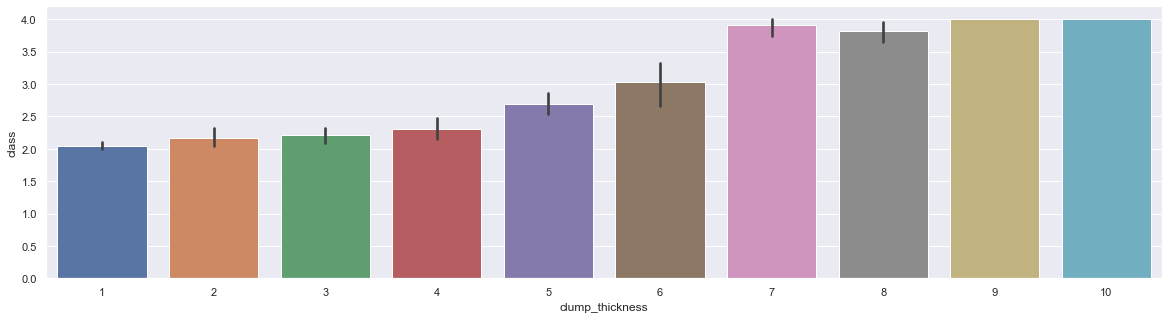

In [68]:
sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(x='clump_thickness',y='class',data=master)

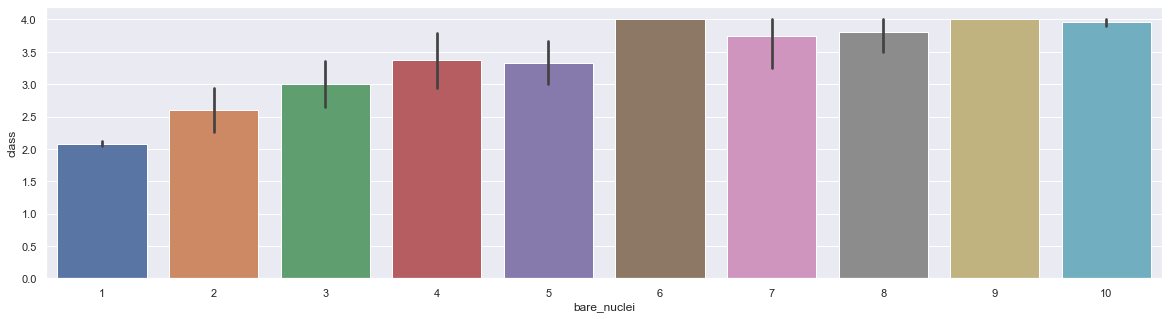

In [70]:
sns.barplot(x='bare_nuclei',y='class',data=master)


## the values that lie somewhere in the middle have a ratio of 4 and 3 so bar graphs are showing the average 

In [83]:
master[master['bare_nuclei'] == 5][['bare_nuclei', 'class']]

,bare_nuclei,class
32,5,4
52,5,4
55,5,4
100,5,4
101,5,4
115,5,2
142,5,4
143,5,2
152,5,4
206,5,4


# Building the model

In [85]:
X = master.drop(['class','id','mitoses'], axis = 1) 

# We have defined the Training Data as we have to predict Class for Cancer, so we removed it 
# Mitoses can be dropped as it has a very low correlation compared to other variables
# Id can be dropped as it usually has no role to play in analysis

y = master['class'] 

# Y is to Be predicted, Target so it is kept separately from the data

'''
# Split datasets into testing and training set using TRAIN_TEST_SPLIT - inbuilt library from sklearn

# Test_size = 0.2 means keeping 20% of randomly selected data for testing out model and keeping rest 80% for Training the model

# Random_State - random_state parameter is used for initializing the internal random number generator, 
                 #which will decide the splitting of data into train and test indices in your case

# SKLEARN : Is the Parent Library in Python where all the Machine learing algorithms are present

'''

'\n# Split datasets into testing and training set using TRAIN_TEST_SPLIT - inbuilt library from sklearn\n\n# Test_size = 0.2 means keeping 20% of randomly selected data for testing out model and keeping rest 80% for Training the model\n\n# Random_State - random_state parameter is used for initializing the internal random number generator, \n                 #which will decide the splitting of data into train and test indices in your case\n\n# SKLEARN : Is the Parent Library in Python where all the Machine learing algorithms are present\n\n'

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.3,
                                                   random_state = 37)

In [88]:
## visualising the splitted data:

display(X_train.head(),
       X_test.head(),
       y_train.head(),
       y_test.head())

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli
40,6,6,6,9,6,1,7,8
222,4,1,1,3,1,5,2,1
291,1,1,1,1,2,1,3,1
514,6,6,7,10,3,10,8,10
207,1,1,1,1,1,1,3,1


,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli
0,5,1,1,1,2,1,3,1
415,3,3,2,6,3,3,3,5
478,5,2,1,1,2,1,1,1
237,9,8,8,5,6,2,4,10
386,7,6,6,3,2,10,7,1


40     2
222    4
291    2
514    4
207    2
Name: class, dtype: int64

0      2
415    2
478    2
237    4
386    4
Name: class, dtype: int64

In [89]:
## checking length of the splitted data

display(len(X_train),
       len(X_test),
       len(y_train),
       len(y_test))

## equal lengths

483

207

483

207

In [90]:
## or like this:
print('X_train',len(X_train), '\t', 'y_train',len(y_train))
print('X_test', len(X_test), '\t','y_test', len(y_test))


X_train 483 	 y_train 483
X_test 207 	 y_test 207


## Using KNN Algorithm as it is a classification problem

In [93]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor


In [94]:
clf = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')

In [95]:
## Training the model on training data

clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

### Predicting on validation/test data

In [98]:
## After fitting the model on train, performing predictions on test

y_pred = clf.predict(X_test)

display(y_pred,
        len(y_pred))

array([2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2,
       4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2,
       2, 4, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2,
       2, 4, 4, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 4, 2, 2, 4, 4], dtype=int64)

207

### Checking accuracy of the predcited values

In [99]:
## importing accuracy score, classification report and confusin matrix

from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [100]:
print('Accuracy_score Testing Data: ',round(accuracy_score(y_test, y_pred)*100,2))

print('\n','Classification_report Testing data: ','\n','\n',classification_report(y_test, y_pred))

Accuracy_score Testing Data:  95.17

 Classification_report Testing data:  
 
               precision    recall  f1-score   support

           2       0.98      0.95      0.96       130
           4       0.91      0.96      0.94        77

    accuracy                           0.95       207
   macro avg       0.94      0.95      0.95       207
weighted avg       0.95      0.95      0.95       207



In [101]:
cm = confusion_matrix(y_test, y_pred)
print(cm) 

[[123   7]
 [  3  74]]


### Predicting on Train data

In [105]:
y_train_pred = clf.predict(X_train)

display(y_train_pred,
        len(y_train_pred))

array([4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4,
       4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2,
       2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2,
       2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2,
       2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2,
       2, 4, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2,
       2, 2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2,
       2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2,
       2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4,
       2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2,

483

### Checking accuracy of predicted train values

In [106]:
print('Accuracy_score Training Data: ',round(accuracy_score(y_train, y_train_pred)*100,2))
print('\n','Classification_report Training Data: ','\n','\n',classification_report(y_train, y_train_pred))

Accuracy_score Training Data:  97.72

 Classification_report Training Data:  
 
               precision    recall  f1-score   support

           2       0.99      0.98      0.98       322
           4       0.96      0.98      0.97       161

    accuracy                           0.98       483
   macro avg       0.97      0.98      0.97       483
weighted avg       0.98      0.98      0.98       483



### Predicting Probability

In [107]:
prob = clf.predict_proba(X_test)

df1 = pd.DataFrame(prob, columns=clf.classes_, index=X_test.index)

df1.head()

,2,4
0,1.000000,0.000000
415,0.428571,0.571429
478,1.000000,0.000000
237,0.000000,1.000000
386,0.000000,1.000000


## Grid Search CV

In [108]:
## Importing Grid Search

from sklearn.model_selection import GridSearchCV

In [109]:
p = {'n_neighbors' : [3,5,7,9,11,13,15,21,25,31],
    'metric':['manhattan','eucledian']
    }

model = GridSearchCV(clf,param_grid= p, cv = 4, verbose = 5)

model.fit(X_train, y_train)


Fitting 4 folds for each of 20 candidates, totalling 80 fits
[CV] metric=manhattan, n_neighbors=3 .................................
[CV] ..... metric=manhattan, n_neighbors=3, score=0.975, total=   0.0s
[CV] metric=manhattan, n_neighbors=3 .................................
[CV] ..... metric=manhattan, n_neighbors=3, score=0.975, total=   0.0s
[CV] metric=manhattan, n_neighbors=3 .................................
[CV] ..... metric=manhattan, n_neighbors=3, score=0.983, total=   0.0s
[CV] metric=manhattan, n_neighbors=3 .................................
[CV] ..... metric=manhattan, n_neighbors=3, score=0.967, total=   0.0s
[CV] metric=manhattan, n_neighbors=5 .................................
[CV] ..... metric=manhattan, n_neighbors=5, score=0.959, total=   0.0s
[CV] metric=manhattan, n_neighbors=5 .................................
[CV] ..... metric=manhattan, n_neighbors=5, score=0.975, total=   0.0s
[CV] metric=manhattan, n_neighbors=5 .................................
[CV] ..... metri

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s



[CV] metric=manhattan, n_neighbors=9 .................................
[CV] ..... metric=manhattan, n_neighbors=9, score=0.967, total=   0.0s
[CV] metric=manhattan, n_neighbors=9 .................................
[CV] ..... metric=manhattan, n_neighbors=9, score=0.975, total=   0.0s
[CV] metric=manhattan, n_neighbors=9 .................................
[CV] ..... metric=manhattan, n_neighbors=9, score=0.958, total=   0.0s
[CV] metric=manhattan, n_neighbors=11 ................................
[CV] .... metric=manhattan, n_neighbors=11, score=0.959, total=   0.0s
[CV] metric=manhattan, n_neighbors=11 ................................
[CV] .... metric=manhattan, n_neighbors=11, score=0.967, total=   0.0s
[CV] metric=manhattan, n_neighbors=11 ................................
[CV] .... metric=manhattan, n_neighbors=11, score=0.975, total=   0.0s
[CV] metric=manhattan, n_neighbors=11 ................................
[CV] .... metric=manhattan, n_neighbors=11, score=0.958, total=   0.0s
[CV] 

C:\Users\aditi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'eucledian' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
C:\Users\aditi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'eucledian' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
C:\Users\aditi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Det

[CV] ...... metric=eucledian, n_neighbors=25, score=nan, total=   0.0s
[CV] metric=eucledian, n_neighbors=25 ................................
[CV] ...... metric=eucledian, n_neighbors=25, score=nan, total=   0.0s
[CV] metric=eucledian, n_neighbors=25 ................................
[CV] ...... metric=eucledian, n_neighbors=25, score=nan, total=   0.0s
[CV] metric=eucledian, n_neighbors=31 ................................
[CV] ...... metric=eucledian, n_neighbors=31, score=nan, total=   0.0s
[CV] metric=eucledian, n_neighbors=31 ................................
[CV] ...... metric=eucledian, n_neighbors=31, score=nan, total=   0.0s
[CV] metric=eucledian, n_neighbors=31 ................................
[CV] ...... metric=eucledian, n_neighbors=31, score=nan, total=   0.0s
[CV] metric=eucledian, n_neighbors=31 ................................
[CV] ...... metric=eucledian, n_neighbors=31, score=nan, total=   0.0s
Best Params:  {'metric': 'manhattan', 'n_neighbors': 3}
model_best_score_ : 9

C:\Users\aditi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'eucledian' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
C:\Users\aditi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'eucledian' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.7s finished


In [111]:
print('Best Params: ',model.best_params_)

print('model_best_score_ :',np.round((model.best_score_)*100,2 ))


Best Params:  {'metric': 'manhattan', 'n_neighbors': 3}
model_best_score_ : 97.51


### Predicting on test data

In [110]:
cv_pred = model.predict(X_test)
cv_pred

array([2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2,
       4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2,
       4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4,
       4, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2,
       2, 4, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2,
       4, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 4, 2, 2, 2, 4], dtype=int64)

### Testing accuracy obtained from grid search cv

In [112]:
print('Accuracy_score Testing Data: ',round(accuracy_score(y_test, cv_pred)*100,2))

print('\n','Classification_report Testing data: ','\n','\n',classification_report(y_test, cv_pred))

Accuracy_score Testing Data:  95.65

 Classification_report Testing data:  
 
               precision    recall  f1-score   support

           2       0.97      0.96      0.97       130
           4       0.94      0.95      0.94        77

    accuracy                           0.96       207
   macro avg       0.95      0.95      0.95       207
weighted avg       0.96      0.96      0.96       207

